In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from mlforecast import MLForecast
from mlforecast.lag_transforms import ExpandingMean, RollingMean, SeasonalRollingMean
from window_ops.rolling import rolling_mean, rolling_max, rolling_min

In [3]:
path = '/Users/stathis/Desktop/UVA_master/Forecasting/FinalProject/'

# df_sales = pd.read_csv(path+"sales_train_validation_afcs2023.csv",)
# df_sales_test = pd.read_csv(path+"sales_test_validation_afcs2023.csv", index_col="id")
# df_prices = pd.read_csv(path+"sell_prices_afcs2023.csv")
# df_calendar = pd.read_csv(path+"calendar_afcs2023.csv")
# #
# df_calendar['date'] = pd.to_datetime(df_calendar['date'])

df_sales_train_all = pd.read_csv(path+"merged_full_all.csv",)
df_sales_test = pd.read_csv(path+"merged_future_all.csv",)
df_sales_test_real_labels = pd.read_csv(path+"sales_test_validation_long.csv",)

In [4]:
df_sales_test

,date,item_id,sell_price,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,...,event_type_1_Religious,event_type_1_Sporting,event_name_2_Cinco_De_Mayo,event_name_2_Easter,event_name_2_Father_s_day,event_name_2_None,event_name_2_OrthodoxEaster,event_type_2_Cultural,event_type_2_None,event_type_2_Religious
0,2016-04-25,FOODS_3_001,2.5,11613,Monday,3,4,2016,None,None,...,0,0,0,0,0,1,0,0,1,0
1,2016-04-26,FOODS_3_001,2.5,11613,Tuesday,4,4,2016,None,None,...,0,0,0,0,0,1,0,0,1,0
2,2016-04-27,FOODS_3_001,2.5,11613,Wednesday,5,4,2016,None,None,...,0,0,0,0,0,1,0,0,1,0
3,2016-04-28,FOODS_3_001,2.5,11613,Thursday,6,4,2016,None,None,...,0,0,0,0,0,1,0,0,1,0
4,2016-04-29,FOODS_3_001,2.5,11613,Friday,7,4,2016,None,None,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23039,2016-05-18,FOODS_3_827,1.0,11616,Wednesday,5,5,2016,None,None,...,0,0,0,0,0,1,0,0,1,0
23040,2016-05-19,FOODS_3_827,1.0,11616,Thursday,6,5,2016,None,None,...,0,0,0,0,0,1,0,0,1,0
23041,2016-05-20,FOODS_3_827,1.0,11616,Friday,7,5,2016,None,None,...,0,0,0,0,0,1,0,0,1,0
23042,2016-05-21,FOODS_3_827,1.0,11617,Saturday,1,5,2016,None,None,...,0,0,0,0,0,1,0,0,1,0


In [5]:
df_sales_train = df_sales_train_all.copy()

In [6]:
# Remove nan in item_id

#df_sales_train = df_sales_train[~df_sales_train["item_id"].isna()]

In [7]:
#change date type

df_sales_train['date'] = pd.to_datetime(df_sales_train['date'])
df_sales_test['date'] = pd.to_datetime(df_sales_test['date'])
df_sales_test_real_labels['date'] = pd.to_datetime(df_sales_test_real_labels['date'])

In [8]:

df_sales_train.drop(df_sales_train.columns[1:10], axis=1, inplace=True)

In [9]:
df_sales_train

,date,snap_TX,item_id,sales,sell_price,event_name_1_Chanukah_End,event_name_1_Christmas,event_name_1_Cinco_De_Mayo,event_name_1_ColumbusDay,event_name_1_Easter,...,event_type_1_Religious,event_type_1_Sporting,event_name_2_Cinco_De_Mayo,event_name_2_Easter,event_name_2_Father_s_day,event_name_2_None,event_name_2_OrthodoxEaster,event_type_2_Cultural,event_type_2_None,event_type_2_Religious
0,2011-01-29,0,FOODS_3_001,0,2.28,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,2011-01-30,0,FOODS_3_001,2,2.28,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,2011-01-31,0,FOODS_3_001,1,2.28,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,2011-02-01,1,FOODS_3_001,3,2.28,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,2011-02-02,0,FOODS_3_001,0,2.28,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574394,2016-04-20,0,FOODS_3_827,0,1.00,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1574395,2016-04-21,0,FOODS_3_827,1,1.00,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1574396,2016-04-22,0,FOODS_3_827,0,1.00,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1574397,2016-04-23,0,FOODS_3_827,0,1.00,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [10]:
# Get a subset of the data

# start_item = "FOODS_3_001"
# end_item = "FOODS_3_113"

# # Generate a list of item IDs from start_item to end_item
# desired_items = [f"FOODS_3_{str(i).zfill(3)}" for i in range(int(start_item[-3:]), int(end_item[-3:]) + 1)]

In [11]:
#df_sales_train = df_sales_train[df_sales_train["item_id"].isin(desired_items)]

In [12]:



#df_sales_train = df_sales_train[["date","item_id","sales","event_name_1","event_type_1","event_name_2","event_type_2"]]

In [13]:
#df_sales_train = df_sales_train.reset_index(drop=True)

In [14]:
# rename

df_sales_train = df_sales_train.rename(columns={'date': 'ds', 'item_id': 'unique_id', 'sales': 'y'})

In [15]:
# from utilsforecast.plotting import plot_series
# fig = plot_series(df_sales_train, max_ids=10, plot_random=False)
# fig

In [16]:
# train = df_sales_train.loc[df_sales_train['ds'] < '2016-03-28']
# valid = df_sales_train.loc[df_sales_train['ds'] >= '2016-03-28']
# h = valid['ds'].nunique()

In [37]:
df_sales_train = df_sales_train[["ds","unique_id","y"]]
df_sales_train

,ds,unique_id,y
0,2011-01-29,FOODS_3_001,0
1,2011-01-30,FOODS_3_001,2
2,2011-01-31,FOODS_3_001,1
3,2011-02-01,FOODS_3_001,3
4,2011-02-02,FOODS_3_001,0
...,...,...,...
1574394,2016-04-20,FOODS_3_827,0
1574395,2016-04-21,FOODS_3_827,1
1574396,2016-04-22,FOODS_3_827,0
1574397,2016-04-23,FOODS_3_827,0


In [31]:
from mlforecast import MLForecast
from mlforecast.target_transforms import Differences
from numba import njit
from window_ops.expanding import expanding_mean
from window_ops.rolling import rolling_mean
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor 


models = [
    xgb.XGBRegressor(),
]


fcst2 = MLForecast(
    models=models,
    freq='D',
    #lags = list(range(1, 29)),  # Add lag values 14 to the existing lags
    lags = [1,3,5,7,14,28],
    lag_transforms={
        1: [(rolling_mean, 1), (rolling_mean, 7)],
        7: [(rolling_mean, 7), (rolling_mean, 28)],
        14: [(rolling_mean, 14), (rolling_mean, 28)], 
        #28: [(rolling_mean, 7), (rolling_mean, 28)],
    },
    date_features=['dayofweek'],
)


In [32]:
fcst2.fit(df_sales_train)

MLForecast(models=[XGBRegressor], freq=D, lag_features=['lag7', 'lag14', 'lag28', 'rolling_mean_lag7_window_size7', 'rolling_mean_lag7_window_size28', 'rolling_mean_lag14_window_size14', 'rolling_mean_lag14_window_size28'], date_features=['dayofweek'], num_threads=1)

In [33]:
# predict 28 days
p = fcst2.predict(28)

In [34]:
df_sales_test_real_labels = df_sales_test_real_labels.rename(columns={'date': 'ds', 'item_id': 'unique_id', 'sales': 'y'})

p = p.merge(df_sales_test_real_labels[['unique_id', 'ds', 'y']], on=['unique_id', 'ds'], how='left')

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

# Mean Absolute Error (MAE)
mae = mean_absolute_error(p['y'], p['XGBRegressor'])
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Squared Error (MSE)
mse = mean_squared_error(p['y'], p['XGBRegressor'])
print(f"Mean Squared Error (MSE): {mse}")

rmse = np.sqrt(mean_squared_error(p['y'], p['XGBRegressor']))

# Root Mean Squared Error (RMSE)
#rmse = mean_squared_error(p['y'], p['XGBRegressor'], squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(p['y'], p['XGBRegressor'])
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

# R-squared (R2)
r2 = r2_score(p['y'], p['XGBRegressor'])
print(f"R-squared (R2): {r2}")


Mean Absolute Error (MAE): 1.4031578203531638
Mean Squared Error (MSE): 8.741460080131095
Root Mean Squared Error (RMSE): 2.9565960292422595
Mean Absolute Percentage Error (MAPE): 1346068128866370.8
R-squared (R2): 0.7340577073281273


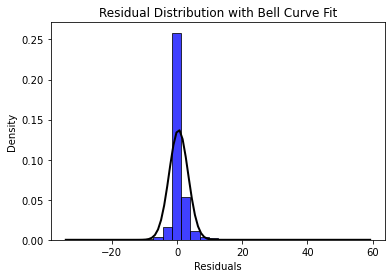

In [22]:
import matplotlib.pyplot as plt

residuals = p['y'] - p['XGBRegressor']

# Create a histogram of residuals
plt.hist(residuals, bins=30, density=True, alpha=0.75, color='blue', edgecolor='black')

# Plot a bell curve
from scipy.stats import norm
mu, std = norm.fit(residuals)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Add labels and title
plt.title('Residual Distribution with Bell Curve Fit')
plt.xlabel('Residuals')
plt.ylabel('Density')

plt.show()


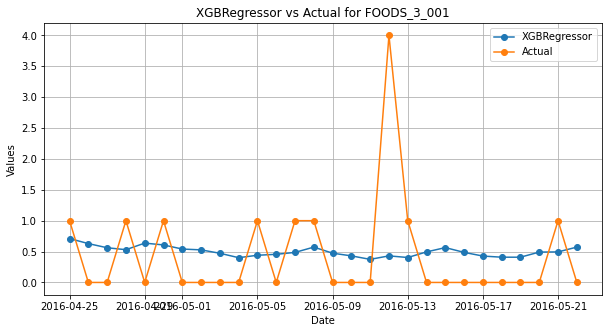

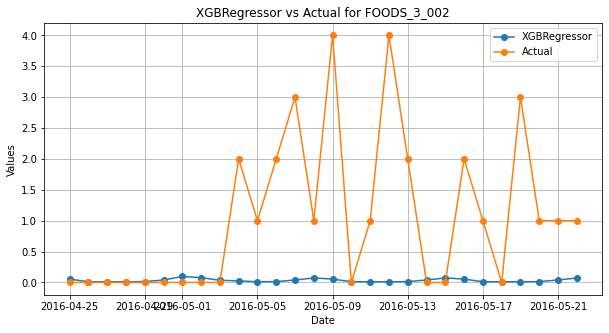

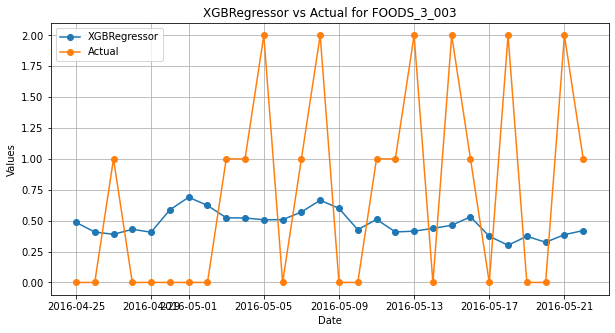

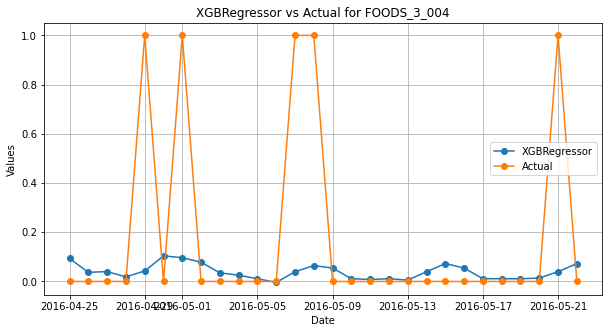

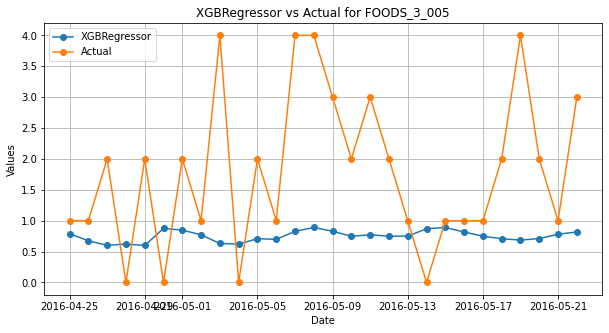

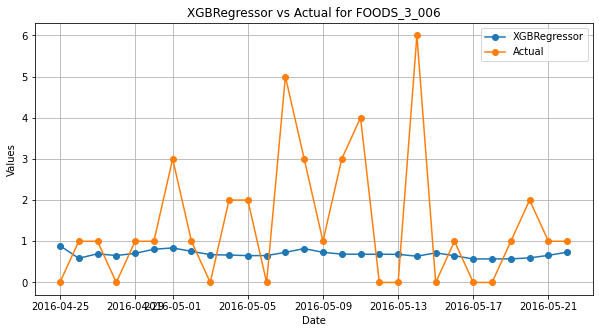

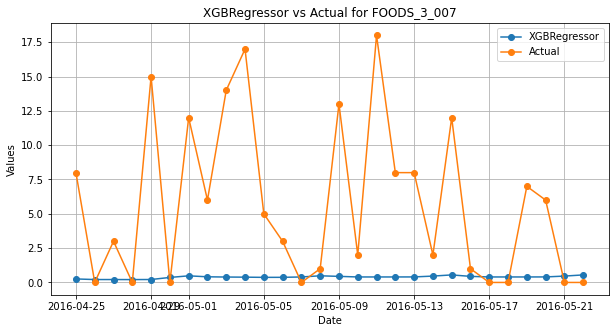

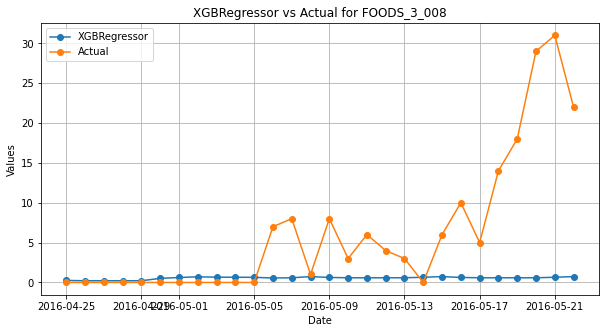

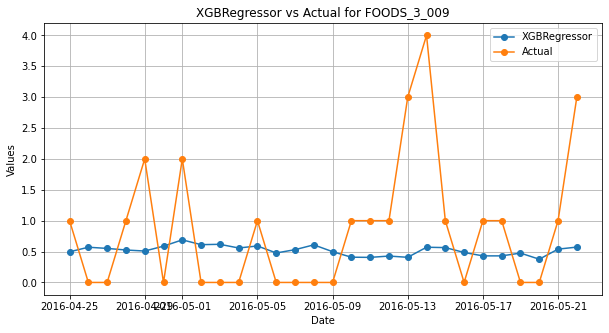

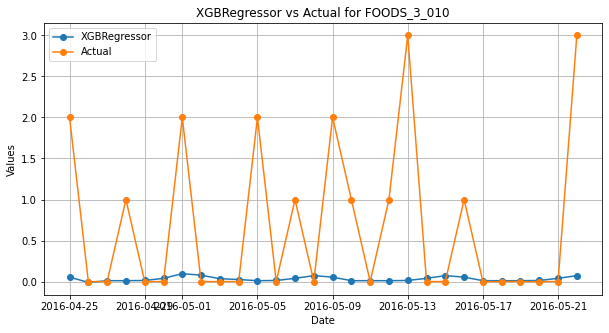

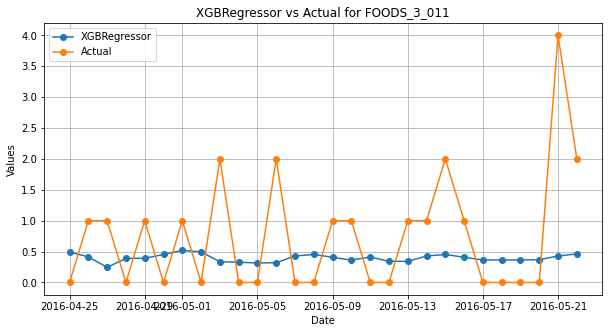

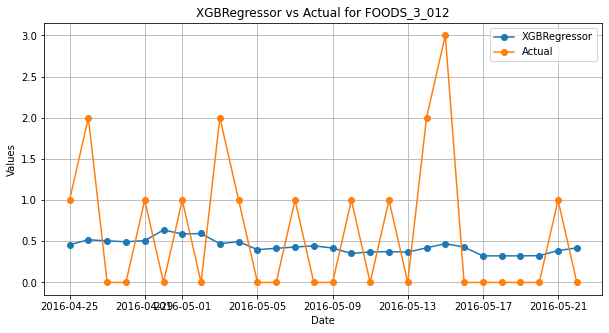

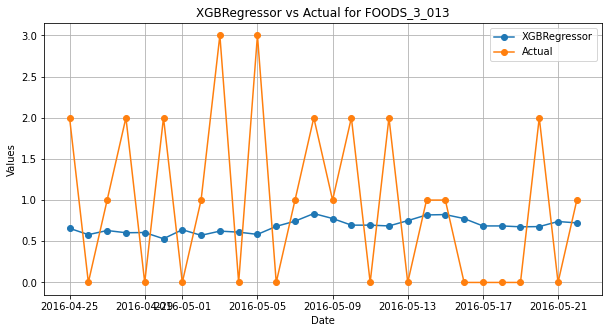

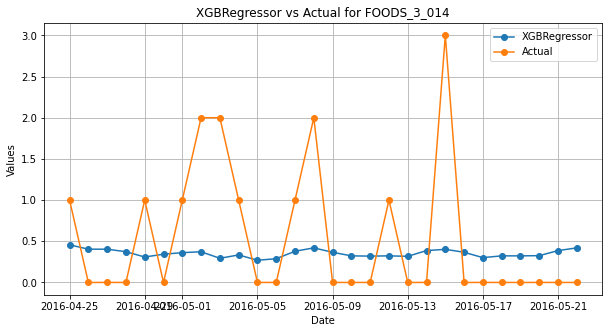

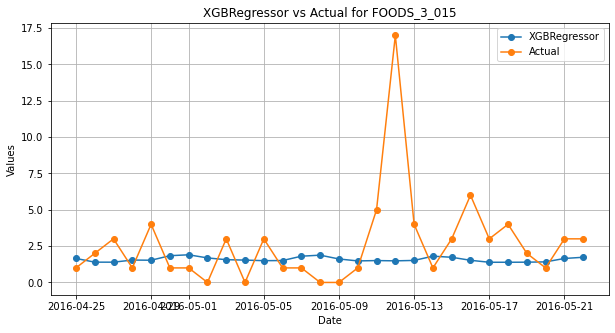

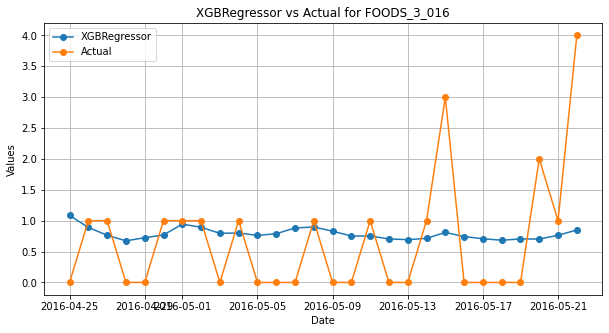

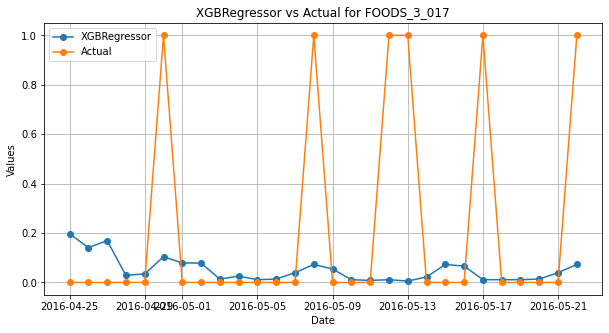

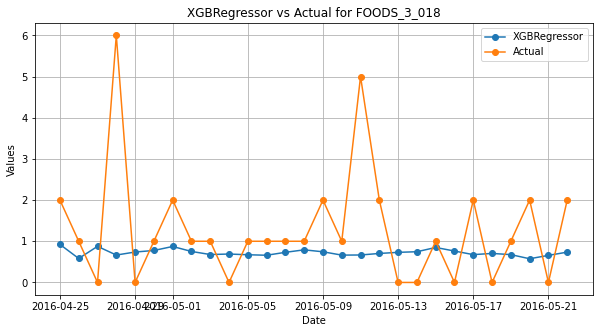

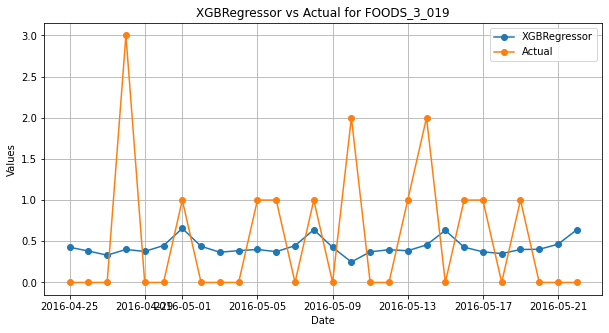

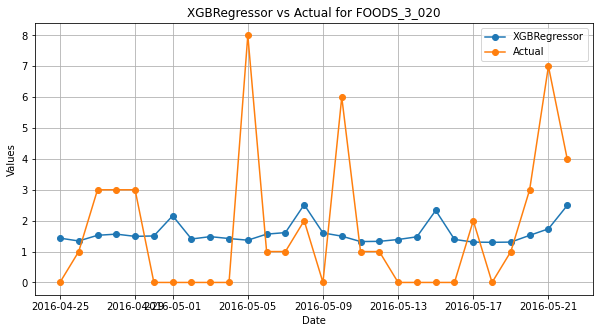

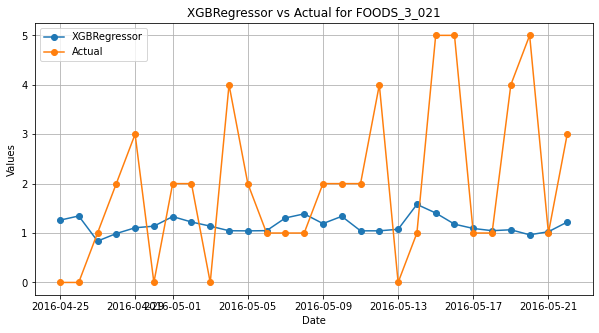

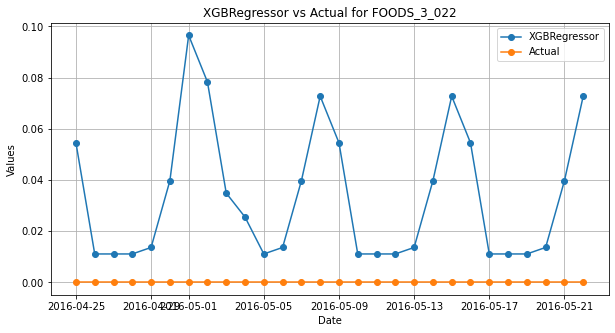

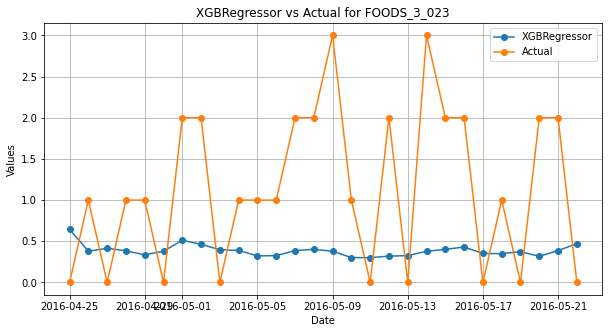

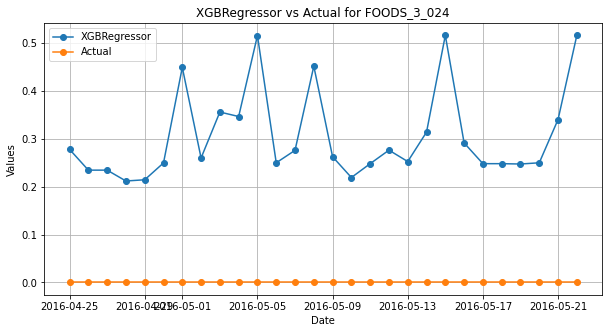

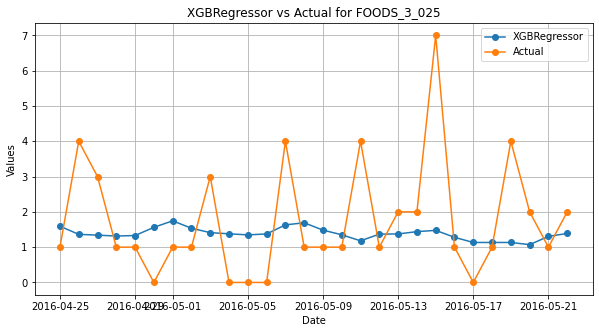

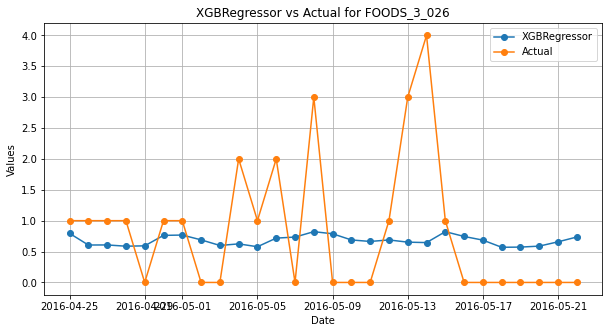

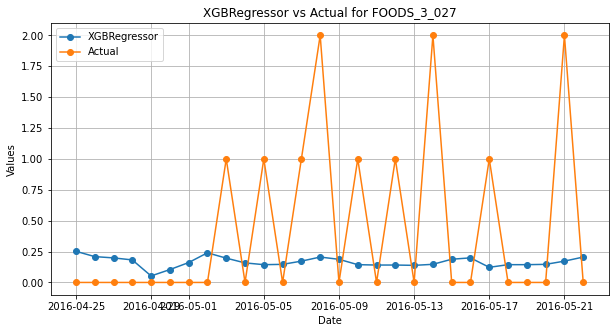

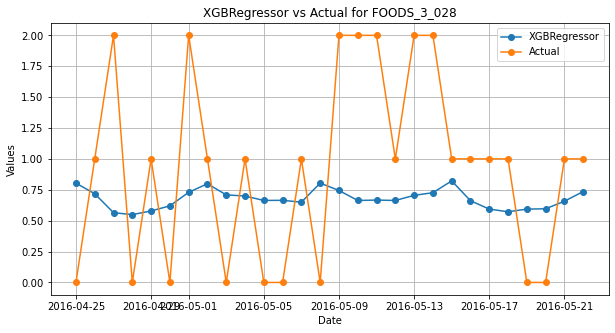

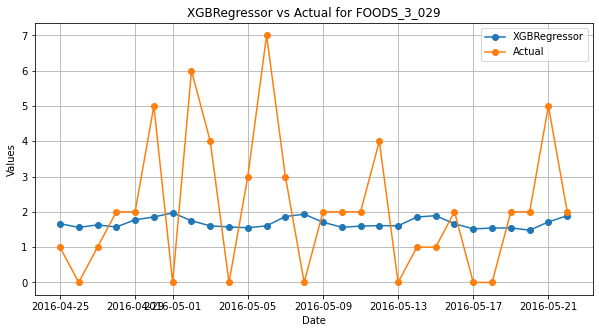

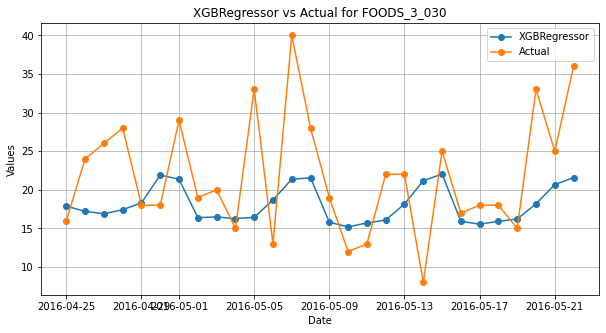

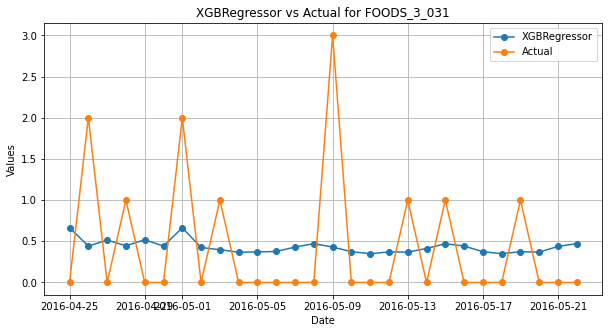

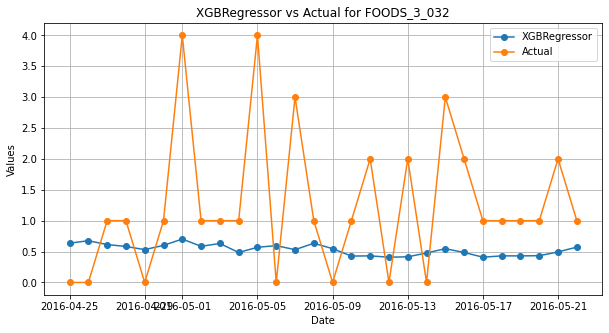

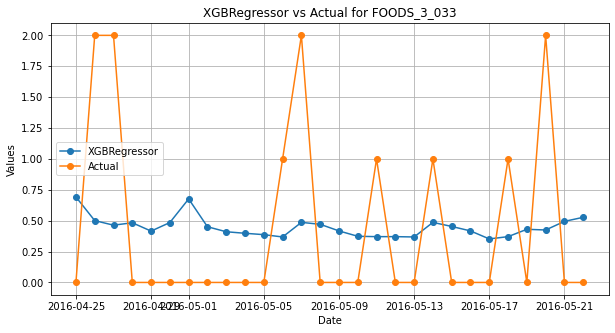

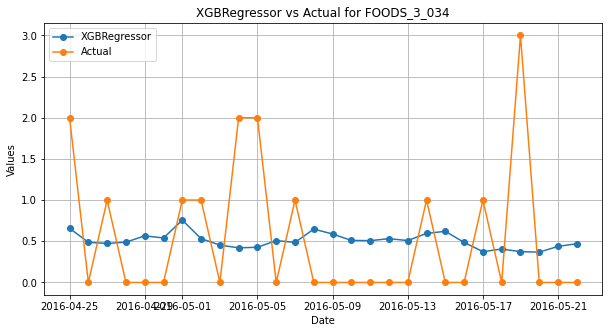

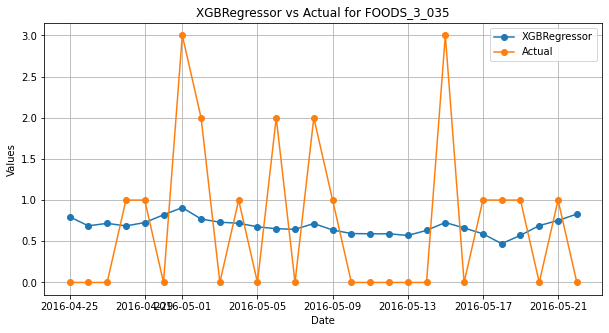

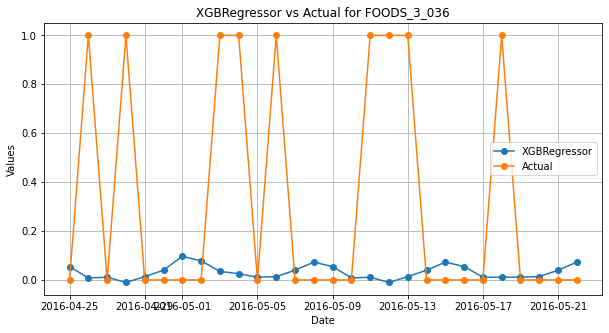

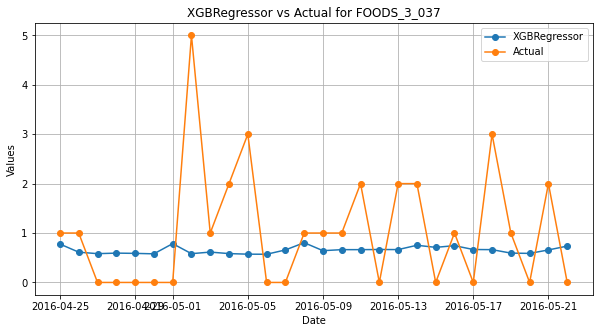

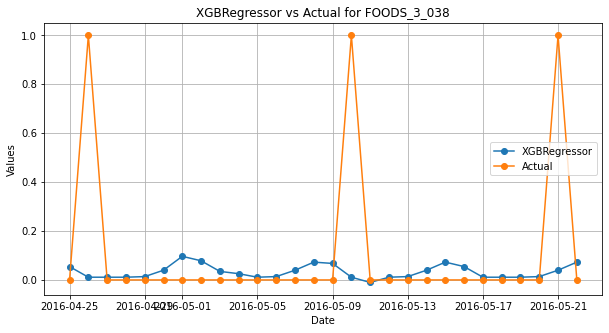

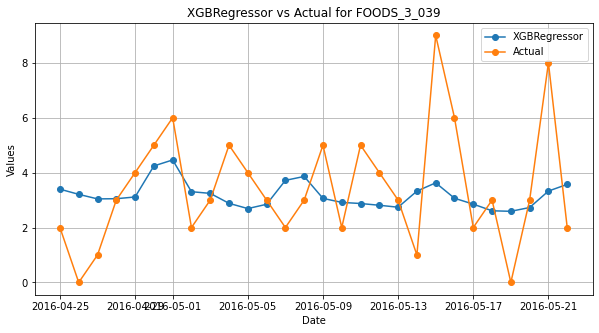

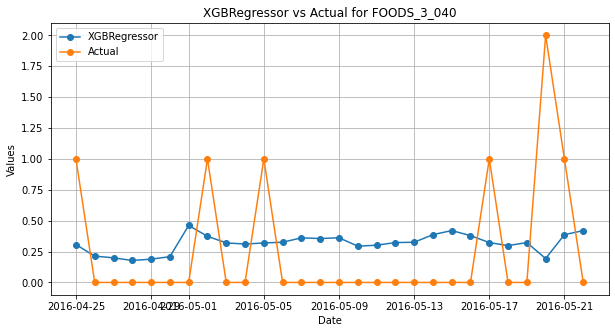

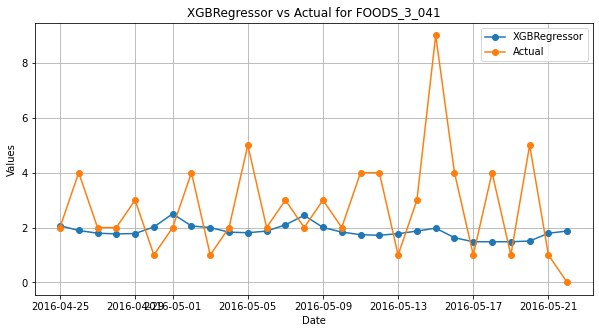

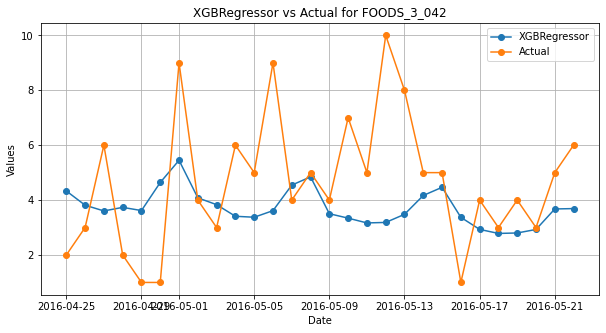

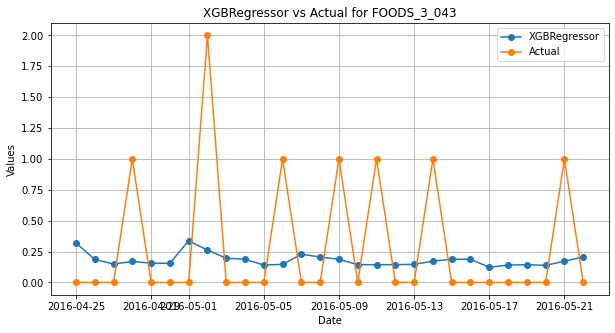

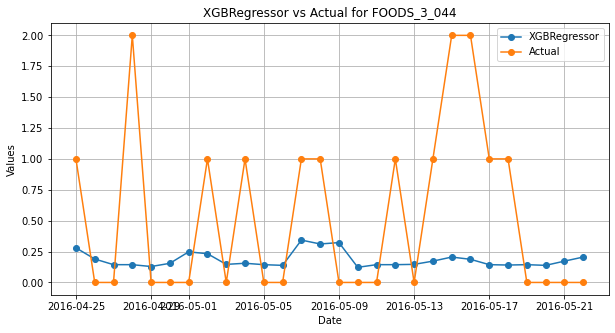

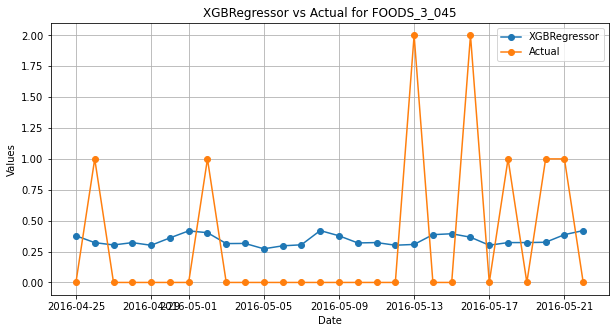

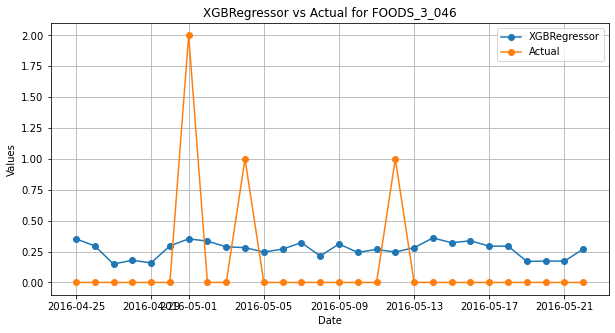

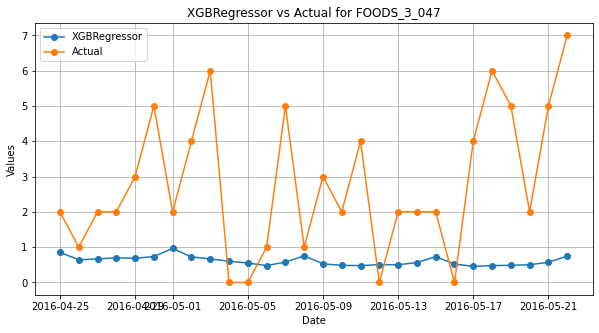

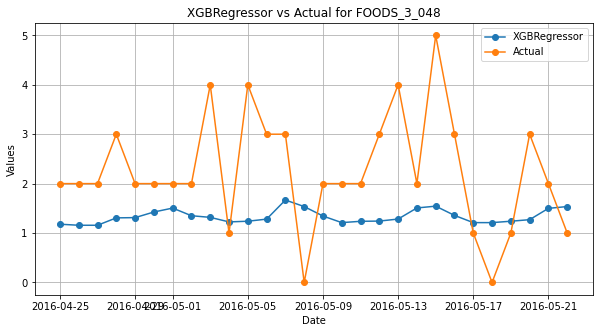

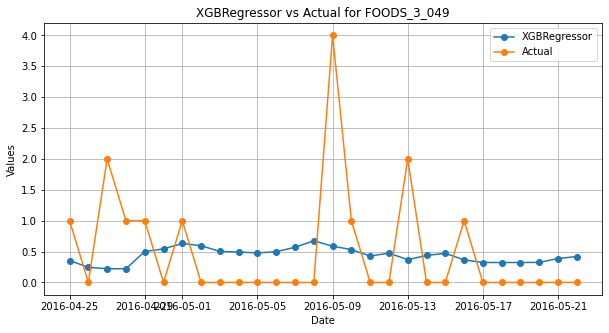

In [565]:
# Plot for each unique_id
unique_ids = p['unique_id'].unique()
counter = 0

for unique_id in unique_ids:
    counter += 1
    if counter == 50:
        break
    df_subset = p[p['unique_id'] == unique_id]
    
    plt.figure(figsize=(10, 5))
    
    # Plot XGBRegressor predictions
    plt.plot(df_subset['ds'], df_subset['XGBRegressor'], label='XGBRegressor', marker='o')
    
    # Plot actual values (y)
    plt.plot(df_subset['ds'], df_subset['y'], label='Actual', marker='o')
    
    # Customize plot
    plt.title(f'XGBRegressor vs Actual for {unique_id}')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.legend()
    plt.grid(True)
    plt.show()

In [41]:
#pip install prettytable


Note: you may need to restart the kernel to use updated packages.


In [5]:
from prettytable import PrettyTable

# Sample data for three models
models = ["Prophet", "STL with MS", "XGBoost"]
rmse_values = [2.03, 2.00, 2.95]
mae_values = [1.57, 1.56, 1.40]

# Create a PrettyTable object
table = PrettyTable()

# Define column names and formatting
table.field_names = ["Model", "RMSE", "MAE"]
table.align["Model"] = "l"  # Left-align the model names
table.float_format = "2.2"   # Format numeric values to two decimal places

# Add data to the table
for model, rmse, mae in zip(models, rmse_values, mae_values):
    table.add_row([model, rmse, mae])

# Print the table
print(table)

+-------------+------+------+
| Model       | RMSE | MAE  |
+-------------+------+------+
| Prophet     | 2.03 | 1.57 |
| STL with MS | 2.00 | 1.56 |
| XGBoost     | 2.95 | 1.40 |
+-------------+------+------+
